In [36]:
# 1. Import Numpy python library
import numpy as np
import os
import PIL
from PIL import Image


SyntaxError: invalid syntax (<ipython-input-36-14cad78a2daa>, line 1)

In [3]:
# 2. Import Keras library and extract sequential class from this library
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical
from keras import backend as K

Using TensorFlow backend.


In [4]:
imagesPath = '/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog/dataset/'

# Get list of all image files

In [5]:
size = 28
def read_image(f):
    im = Image.open(f)
    im = im.resize((size, size), PIL.Image.NEAREST)
    im = np.asarray(im, dtype='float64')
    im[:,:,0] -= 103.939
    im[:,:,1] -= 116.779
    im[:,:,2] -= 123.68
    #im = im.reshape(1,224,224,3)
    im = im.reshape(size,size,3)
    return(im)

os.chdir(imagesPath)
im = read_image('0-1.png')
print(im.shape)
#print(im)

(28, 28, 3)


# Resize images to 28x28

In [6]:
img_files = []
for root, dirs, files in os.walk(imagesPath):
    img_files.extend(files)

print(len(img_files))

1969


In [12]:
n_files = len(img_files)
print('Total number of images:', n_files)

train_size = n_files
sample_size = min(n_files,train_size)
print('Sample images taken:', sample_size)
sample = [img_files[i] for i in np.random.choice(len(files),size=sample_size, replace=False)]

print(len(sample))

('Total number of images:', 1969)
('Sample images taken:', 1969)
1969


In [16]:
print(files)

['img029-00059.png', 'img023-00002.png', '1-8.png', 'img006-00053.png', 'img032-00019.png', 'img030-00106.png', 'img029-00065.png', 'img029-00071.png', 'img030-00112.png', 'img018-00183.png', 'img011-00488.png', 'img011-00463.png', 'img011-00305.png', 'img011-00311.png', 'img011-00477.png', 'img010-00010.png', 'img011-00339.png', 'img010-00004.png', 'img026-00151.png', 'img029-00267.png', 'img030-00304.png', 'img030-00310.png', 'img029-00273.png', 'img029-00298.png', 'img011-00107.png', 'img025-00159.png', 'img011-00113.png', 'img025-00171.png', 'img014-00108.png', 'img015-00235.png', 'img030-00258.png', 'img029-00313.png', 'img022-00061.png', 'img030-00270.png', 'img030-00264.png', 'img011-00098.png', 'img029-00307.png', 'img011-00073.png', 'img011-00067.png', 'img034-00022.png', 'img024-00338.png', 'img028-00204.png', 'img004-00010.png', 'img029-00139.png', 'img012-00090.png', 'img015-00037.png', 'img030-00072.png', 'img029-00111.png', 'img029-00105.png', 'img030-00066.png', 'img021-

In [18]:
print(read_image(imagesPath+"img017-00077.png"))

[[[81.061 64.221 71.32 ]
  [81.061 65.221 67.32 ]
  [84.061 70.221 71.32 ]
  ...
  [68.061 55.221 58.32 ]
  [65.061 51.221 52.32 ]
  [48.061 35.221 38.32 ]]

 [[79.061 63.221 67.32 ]
  [80.061 65.221 71.32 ]
  [77.061 68.221 72.32 ]
  ...
  [66.061 53.221 56.32 ]
  [68.061 52.221 54.32 ]
  [61.061 47.221 48.32 ]]

 [[83.061 66.221 73.32 ]
  [74.061 68.221 71.32 ]
  [80.061 66.221 73.32 ]
  ...
  [67.061 52.221 56.32 ]
  [69.061 53.221 57.32 ]
  [71.061 56.221 60.32 ]]

 ...

 [[88.061 66.221 80.32 ]
  [83.061 70.221 75.32 ]
  [84.061 69.221 75.32 ]
  ...
  [70.061 56.221 57.32 ]
  [72.061 59.221 64.32 ]
  [74.061 61.221 66.32 ]]

 [[80.061 70.221 78.32 ]
  [81.061 70.221 75.32 ]
  [85.061 72.221 77.32 ]
  ...
  [73.061 59.221 60.32 ]
  [71.061 58.221 63.32 ]
  [74.061 61.221 66.32 ]]

 [[87.061 72.221 78.32 ]
  [83.061 70.221 75.32 ]
  [85.061 70.221 76.32 ]
  ...
  [73.061 58.221 62.32 ]
  [72.061 59.221 64.32 ]
  [78.061 65.221 70.32 ]]]


Here total images i have = 1969 and choosing a sample of 1200 images to train

In [17]:
i=0
input_data = []
output_data = []
print('Reading train images ...')

for file in img_files:
    if(i%5==0):
        print('Read {} images'.format(i))
    if file == '.DS_Store':
        print('Found DS Store')
        continue
    im = read_image(imagesPath+file)
    input_data.append(im)
    if file.startswith('0-'):
        output_data.append(0)
    elif file.startswith('1-'):
        output_data.append(1)
    elif file.startswith('2-'):
        output_data.append(2)
    elif file.startswith('img004-'):
        output_data.append(3)    
    elif file.startswith('img005-'):
        output_data.append(4)    
    elif file.startswith('img006-'):
        output_data.append(5)    
    elif file.startswith('img007-'):
        output_data.append(6)    
    elif file.startswith('img008-'):
        output_data.append(7)    
    elif file.startswith('img009-'):
        output_data.append(8)    
    elif file.startswith('img010-'):
        output_data.append(9)    
    elif file.startswith('img011-'):
        output_data.append(10)    
    elif file.startswith('img012-'):
        output_data.append(11)    
    elif file.startswith('img013-'):
        output_data.append(12)    
    elif file.startswith('img014-'):
        output_data.append(13)    
    elif file.startswith('img015-'):
        output_data.append(14)    
    elif file.startswith('img016-'):
        output_data.append(15)    
    elif file.startswith('img017-'):
        output_data.append(16)    
    elif file.startswith('img018-'):
        output_data.append(17)    
    elif file.startswith('img019-'):
        output_data.append(18)    
    elif file.startswith('img020-'):
        output_data.append(19) 
    elif file.startswith('img021-'):
        output_data.append(20) 
    elif file.startswith('img022-'):
        output_data.append(21) 
    elif file.startswith('img023-'):
        output_data.append(22) 
    elif file.startswith('img024-'):
        output_data.append(23) 
    elif file.startswith('img025-'):
        output_data.append(24) 
    elif file.startswith('img026-'):
        output_data.append(25) 
    elif file.startswith('img027-'):
        output_data.append(26) 
    elif file.startswith('img028-'):
        output_data.append(27) 
    elif file.startswith('img029-'):
        output_data.append(28) 
    elif file.startswith('img030-'):
        output_data.append(29) 
    elif file.startswith('img031-'):
        output_data.append(30) 
    elif file.startswith('img032-'):
        output_data.append(31) 
    elif file.startswith('img033-'):
        output_data.append(32) 
    elif file.startswith('img034-'):
        output_data.append(33)
    elif file.startswith('img035-'):
        output_data.append(34) 
    elif file.startswith('img036-'):
        output_data.append(35)         
    i+=1

print("Done reading all images")

Reading train images ...
Read 0 images
Read 5 images
Read 10 images
Read 15 images
Read 20 images
Read 25 images
Read 30 images
Read 35 images
Read 40 images
Read 45 images
Read 50 images
Read 55 images
Read 60 images
Read 65 images
Read 70 images
Read 75 images
Read 80 images
Read 85 images
Read 90 images
Read 95 images
Read 100 images
Read 105 images
Read 110 images
Read 115 images
Read 120 images
Read 125 images
Read 130 images
Read 135 images
Read 140 images
Read 145 images
Read 150 images
Read 155 images
Read 160 images
Read 165 images
Read 170 images
Read 175 images
Read 180 images
Read 185 images
Read 190 images
Read 195 images
Read 200 images
Read 205 images
Read 210 images
Read 215 images
Read 220 images
Read 225 images
Read 230 images
Read 235 images
Read 240 images
Read 245 images
Read 250 images
Read 255 images
Read 260 images
Read 265 images
Read 270 images
Read 275 images
Read 280 images
Found DS Store
Read 285 images
Read 290 images
Read 295 images
Read 300 images
Read 3

In [19]:
print(len(input_data))
print(len(output_data))

1968
1968


In [24]:
all_data = np.array(input_data)
print(all_data.shape)

(1968, 28, 28, 3)


In [1]:
print(all_data)

NameError: name 'all_data' is not defined

In [28]:
target_allData = np.array(output_data)
print(target_allData.shape)

(1968,)


In [31]:
## save this to npz file
os.chdir('/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog/')
np.savez_compressed('npz_all_1965_Images_nparray', data=all_data, labels=target_allData)

# Split data into Train and Validation 80-20

In [30]:
from sklearn.model_selection import train_test_split
RANDOM_SEED = 42
x_train, x_validation, y_train, y_validation = train_test_split(all_data, target_allData, train_size=0.8)

/usr/local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
print('train_data:', x_train.shape)
print('train_labels:', y_train.shape)
print('test_data:', x_validation.shape)
print('test_labels:', y_validation.shape)

('train_data:', (1574, 28, 28, 3))
('train_labels:', (1574,))
('test_data:', (394, 28, 28, 3))
('test_labels:', (394,))


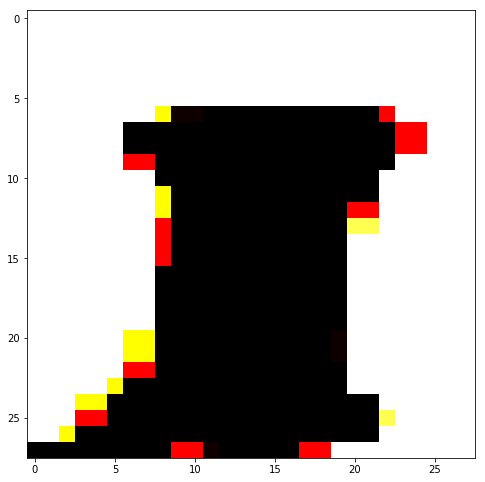

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(size,size))
plt.subplot(3,3,1)
plt.imshow(x_train[9])
# plt.subplot(3,3,2)
# plt.imshow(x_train[100])
# plt.subplot(3,3,3)
# plt.imshow(x_train[30])

# - Tuning Parameters

In [33]:
batch_size = 32
nb_classes = 36
number_of_epochs = 50

img_rows, img_cols = size, size  # input image dimensions
img_channels = 3  
kernalSize = (3, 3)
poolingSize = (2, 2)
dropoutValue = 0.2

activationType = "relu"
outputActivation = "softmax"


# Convert class vectors to binary class matrices.

In [35]:
from keras.utils import to_categorical
y_train_labels = to_categorical(y_train, nb_classes)
y_test_labels = to_categorical(y_validation, nb_classes)

print(y_train_labels[0])
print(y_test_labels.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(394, 36)


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D

# ` Create Sequential Model
filters(eg: 32): Number of convolution filters to use.
img_rows: Number of rows in the convolution kernel.
img_cols: Number of columns in the convolution kernel.


In [46]:
model = Sequential()
model.add(Convolution2D(filters=32, kernel_size=kernalSize, padding='same', 
                        input_shape=(img_rows,img_cols,img_channels), 
                        activation='relu'))
model.add(Convolution2D(filters=32, kernel_size=kernalSize, activation='relu'))
model.add(MaxPooling2D(pool_size=poolingSize))
model.add(Dropout(dropoutValue))

model.add(Convolution2D(filters=64, kernel_size=kernalSize, padding='same', activation='relu'))
model.add(Convolution2D(filters=64, kernel_size=kernalSize, activation='relu'))
model.add(MaxPooling2D(pool_size=poolingSize))
model.add(Dropout(dropoutValue))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(dropoutValue))
model.add(Dense(256, activation='relu'))
model.add(Dropout(dropoutValue))
model.add(Dense(nb_classes, activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [48]:
os.chdir('/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog/models')
import keras
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.textClassifier.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

In [49]:
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_train /= 255
x_validation /= 255

In [50]:
os.chdir('/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog')

# Build Model

In [ ]:
## Model with history saving
model.fit(x_train, y_train_labels, batch_size=batch_size, epochs=number_of_epochs, callbacks=callbacks_list,
            validation_data=(x_validation, y_test_labels), verbose=1)

In [51]:
# Model without history save
model.fit(x_train, y_train_labels, batch_size=batch_size, epochs=number_of_epochs,
            validation_data=(x_validation, y_test_labels), verbose=1)

Train on 1574 samples, validate on 394 samples
Epoch 1/50
1574/1574 [==============================] - 5s 3ms/step - loss: 2.9501 - acc: 0.2503 - val_loss: 2.7020 - val_acc: 0.2868
Epoch 2/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7748 - acc: 0.2776 - val_loss: 2.8306 - val_acc: 0.2868
Epoch 3/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7519 - acc: 0.2770 - val_loss: 2.7148 - val_acc: 0.2868
Epoch 4/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7364 - acc: 0.2802 - val_loss: 2.6691 - val_acc: 0.2868
Epoch 5/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7304 - acc: 0.2814 - val_loss: 2.6910 - val_acc: 0.2868
Epoch 6/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7357 - acc: 0.2821 - val_loss: 2.6437 - val_acc: 0.2868
Epoch 7/50
1574/1574 [==============================] - 4s 3ms/step - loss: 2.7291 - acc: 0.2827 - val_loss: 2.6590 - val_acc: 0.2868
Epoch 8/50
1574

In [ ]:
print(model.summary())

# Save Model

In [ ]:
os.chdir('/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog')
model.save('SingleCharRecognition.h5')

# Test Predictions

In [ ]:
test_imagesPath = '/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog/test_images/'
os.chdir(test_imagesPath)

In [ ]:
test_img_files = []
for root, dirs, files in os.walk(test_imagesPath):
    test_img_files.extend(files)

print((test_img_files))



In [ ]:
test_img_files[1]

In [ ]:
sample = [test_img_files[i] for i in np.random.choice(len(files),size=len(test_img_files), replace=False)]

for imageFile in sample:
    print(imageFile)
    if imageFile == '.DS_Store':
        print('Found DS Store')
        continue
    im = read_image(test_imagesPath+imageFile)
    im2arr = np.array(im)
    im2arr = im2arr.reshape(1,28,28,3)
    y_pred = model.predict(im2arr)
    print(y_pred)
    pred = y_pred[0]
    classes = np.argmax(pred)
    print(classes)


In [ ]:
test_arr = np.array(test_input_data)
test_data = test_arr.astype('float32')
test_data /= 255

In [ ]:
print(test_data.shape)
print(test_data[0].shape)

# iOS Model Building

In [1]:
import coremltools
# import converters
# import proto

In [13]:
from keras.models import load_model

In [14]:
import os
os.chdir('/Users/sandeepn/Desktop/NumberPlateRec/DigitRecog')


In [15]:
core_model = load_model('SingleCharRecognition.h5')

In [2]:
coremltools.SPECIFICATION_VERSION


1

In [16]:
output_names = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [17]:
coreml_model = coremltools.converters.keras.convert(core_model, 
                                                    image_scale=1, 
                                                    red_bias=-104, green_bias=-123.68, blue_bias=-116.78,
                                                    input_names='data', 
                                                    image_input_names='data', 
                                                    output_names='Handwritten Value is', 
                                                    class_labels=output_names)




0 : conv2d_5_input, <keras.engine.input_layer.InputLayer object at 0x1230547d0>
1 : conv2d_5, <keras.layers.convolutional.Conv2D object at 0x123054cd0>
2 : conv2d_5__activation__, <keras.layers.core.Activation object at 0x1230c5410>
3 : conv2d_6, <keras.layers.convolutional.Conv2D object at 0x123054d50>
4 : conv2d_6__activation__, <keras.layers.core.Activation object at 0x122f56c50>
5 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x1230c8c10>
6 : conv2d_7, <keras.layers.convolutional.Conv2D object at 0x1230c8050>
7 : conv2d_7__activation__, <keras.layers.core.Activation object at 0x1230c5450>
8 : conv2d_8, <keras.layers.convolutional.Conv2D object at 0x123079d50>
9 : conv2d_8__activation__, <keras.layers.core.Activation object at 0x1230c5490>
10 : max_pooling2d_4, <keras.layers.pooling.MaxPooling2D object at 0x1230f4550>
11 : flatten_2, <keras.layers.core.Flatten object at 0x1230f4b50>
12 : dense_4, <keras.layers.core.Dense object at 0x123102f50>
13 : dense_4__activat

In [18]:
coreml_model.author = 'Sandeep Nakka'
coreml_model.license = 'Char72k'
coreml_model.short_description = 'Handwritter single Digit/character detection (Char 72k)'


In [19]:
coreml_model.save('HandwrittenSingleCharDetection02.mlmodel')